In [1]:
import os
import xarray as xr
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt, dates as mdates
from netCDF4 import Dataset

In [2]:
d0 = dt.datetime(2016,8,1)
d1 = dt.datetime(2020,7,31)
dates = [d0 + dt.timedelta(i) for i in range(1 + (d1-d0).days)]

In [3]:
osisaf_dir = '/Data/sim/data/OSISAF_ice_conc/polstere/'
osisaf_fmt = os.path.join(osisaf_dir, '%Y_nh_polstere/ice_conc_nh_polstere-100_multi_%Y%m%d1200.nc')
files = [d.strftime(osisaf_fmt) for d in dates]
bad = []
for d, f in zip(dates, files):
    if not os.path.exists(f):
        bad += [(d,f)]
        print(d, f)
for d, f in bad:
    dates.remove(d)
    files.remove(f)

2017-02-20 00:00:00 /Data/sim/data/OSISAF_ice_conc/polstere/2017_nh_polstere/ice_conc_nh_polstere-100_multi_201702201200.nc
2017-02-21 00:00:00 /Data/sim/data/OSISAF_ice_conc/polstere/2017_nh_polstere/ice_conc_nh_polstere-100_multi_201702211200.nc
2018-01-20 00:00:00 /Data/sim/data/OSISAF_ice_conc/polstere/2018_nh_polstere/ice_conc_nh_polstere-100_multi_201801201200.nc


In [4]:
ds = xr.open_dataset(files[-1])
ds

<xarray.Dataset>
Dimensions:                   (nv: 2, time: 1, xc: 760, yc: 1120)
Coordinates:
  * time                      (time) datetime64[ns] 2020-07-31T12:00:00
  * xc                        (xc) float64 -3.845e+03 -3.835e+03 ... 3.745e+03
  * yc                        (yc) float64 5.845e+03 5.835e+03 ... -5.345e+03
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    ice_conc                  (time, yc, xc) float32 ...
    ice_conc_unfiltered       (time, yc, xc) float32 ...
    masks                     (time, yc, xc) float32 ...
    confidence_level          (time, yc, xc) float32 ...
    status_flag               (time, yc, xc) float32 ...
    total_uncertainty         (time, yc, xc) float32 ...
    smearing_uncertainty      (time, yc, xc) float32 ...
    algorithm_uncertainty     (time, yc, xc) float32 ...
Attributes:
    title:                   Daily Sea Ice Concentration Analysis from OSI SA...
    product_id:              OSI-401
    product_name:            osi_saf_ice_conc
    product_status:          operational
    abstract:                The daily analysis of sea ice concentration is o...
    topiccategory:           Oceans Climatology Meteorology Atmosphere
    keywords:                Sea Ice Concentration, Sea Ice, Oceanography, Me...
    gcmd_keywords:           Cryosphere > Sea Ice > Sea Ice Concentration\nOc...
    activity_type:           Space borne instrument
    easternmost_longitude:   180.0
    westernmost_longitude:   -180.0
    northernmost_latitude:   90.0
    southernmost_latitude:   17.71352
    area:                    Northern Hemisphere
    instrument_type:         Multi-sensor analysis
    platform_name:           Multi-sensor analysis
    start_date:              2020-07-31 00:00:00
    stop_date:               2020-08-01 00:00:00
    project_name:            EUMETSAT OSI SAF
    institution:             EUMETSAT OSI SAF
    PI_name:                 Rasmus Tonboe
    contact:                 osisaf-manager@met.no
    distribution_statement:  Free
    copyright_statement:     Copyright 2020 EUMETSAT
    references:              Product User Manual for OSI SAF Global Sea Ice C...
    history:                 2020-08-01 creation
    product_version:         4.0
    software_version:        1.3
    netcdf_version:          3.6.3
    Conventions:             CF-1.6

In [5]:
ds['ice_conc']

<xarray.DataArray 'ice_conc' (time: 1, yc: 1120, xc: 760)>
[851200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-07-31T12:00:00
  * xc       (xc) float64 -3.845e+03 -3.835e+03 ... 3.735e+03 3.745e+03
  * yc       (yc) float64 5.845e+03 5.835e+03 ... -5.335e+03 -5.345e+03
    lat      (yc, xc) float32 ...
    lon      (yc, xc) float32 ...
Attributes:
    long_name:      The filtered sea ice concentration on the northern hemisp...
    comment:        This field contains the ice concentration from field ice_...
    standard_name:  sea_ice_area_fraction
    units:          %
    valid_min:      0
    valid_max:      10000
    grid_mapping:   Polar_Stereographic_Grid

In [6]:
sic = 1e-2*ds['ice_conc'].values[0]
sic
# plt.imshow(sic, cmap='bone',clim=[0,1])

array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.]], dtype=float32)

In [7]:
def get_conc_series_at_point(files, i, j):
    dates = []
    sic = []
    with Dataset(files[0], 'r') as ds:
        lon = float(ds.variables['lon'][i,j])
        lat = float(ds.variables['lat'][i,j])
    for f in files:
        with Dataset(f, 'r') as ds:
            dates
            sic += [1e-2*ds.variables['ice_conc'][0,i,j]]
    return sic, lon, lat

In [8]:
#very slow
#ds = xr.open_mfdataset(files)

In [9]:
files[0]

'/Data/sim/data/OSISAF_ice_conc/polstere/2016_nh_polstere/ice_conc_nh_polstere-100_multi_201608011200.nc'

12.994330406188965 80.44190979003906


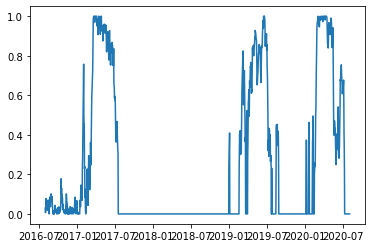

In [10]:
# point off Svalbard:
i = 639
j = 473
sic_all, lon,lat = get_conc_series_at_point(files, i, j)
print(lon, lat)
plt.plot(dates, sic_all)

37.079078674316406 79.3118896484375


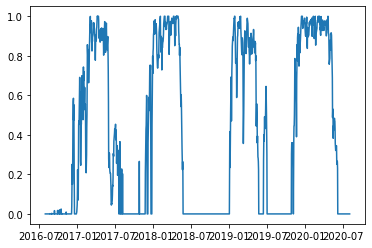

In [11]:
# point in Barents Sea
i = 600
j = 500
sic_all, lon,lat = get_conc_series_at_point(files, i, j)
print(lon, lat)
plt.plot(dates, sic_all)